In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
gfp_stats <-
    read_csv(
        'opt_vs_rmpi1640-r_vs_t-day3.csv',
        col_types=cols(
            `Media`=col_factor(levels=c('RPMI1640', 'OPTimizer')),
            `Buffer`=col_factor(levels=c('R', 'T')),
            `Electroporation`=col_factor(levels=c('No', 'Yes')),
            `Replicate`=col_factor(levels=c("1", "2", "3")),
            .default=col_double()
        )
    ) %>%
    mutate(
        `Absolute_count`=`GFP+ Percent` * `Live cells per ml`,
        `Buffer`=factor(`Buffer`, labels=c("R Buffer", "T Buffer")),
        `Media`=factor(`Media`, labels=c("RPMI1640 media", "OPTimizer media"))
    ) %>%
    group_by(`Media`, `Buffer`, `Electroporation`) %>%
    summarize(
        `GFP_mean`=mean(`GFP+ Percent`),
        `GFP_sd`=sd(`GFP+ Percent`),
        `Count_mean`=mean(`Live cells per ml`),
        `Count_sd`=sd(`Live cells per ml`),
        `Absolute_mean`=mean(`Absolute_count`),
        `Absolute_sd`=sd(`Absolute_count`)
    )

gfp_stats

Media,Buffer,Electroporation,GFP_mean,GFP_sd,Count_mean,Count_sd,Absolute_mean,Absolute_sd
RPMI1640 media,R Buffer,No,0.4633333,0.04041452,608000.00,106056.589,279866.7,37233.05
RPMI1640 media,R Buffer,Yes,68.8333333,0.96090235,235666.67,27300.794,16226233.3,1947246.88
RPMI1640 media,T Buffer,No,0.8000000,0.26664583,783000.00,48569.538,624910.0,208145.51
RPMI1640 media,T Buffer,Yes,64.7000000,0.86602540,243666.67,35837.597,15748900.0,2159441.27
OPTimizer media,R Buffer,No,0.2333333,0.01527525,1830000.00,52915.026,427466.7,39087.12
OPTimizer media,R Buffer,Yes,93.1666667,0.61101009,108433.33,21962.772,10098603.3,2026829.73
OPTimizer media,T Buffer,No,0.4033333,0.19218047,1993333.33,255799.401,826400.0,487997.41
OPTimizer media,T Buffer,Yes,31.4000000,8.05791536,49866.67,5052.062,1551293.3,326483.96


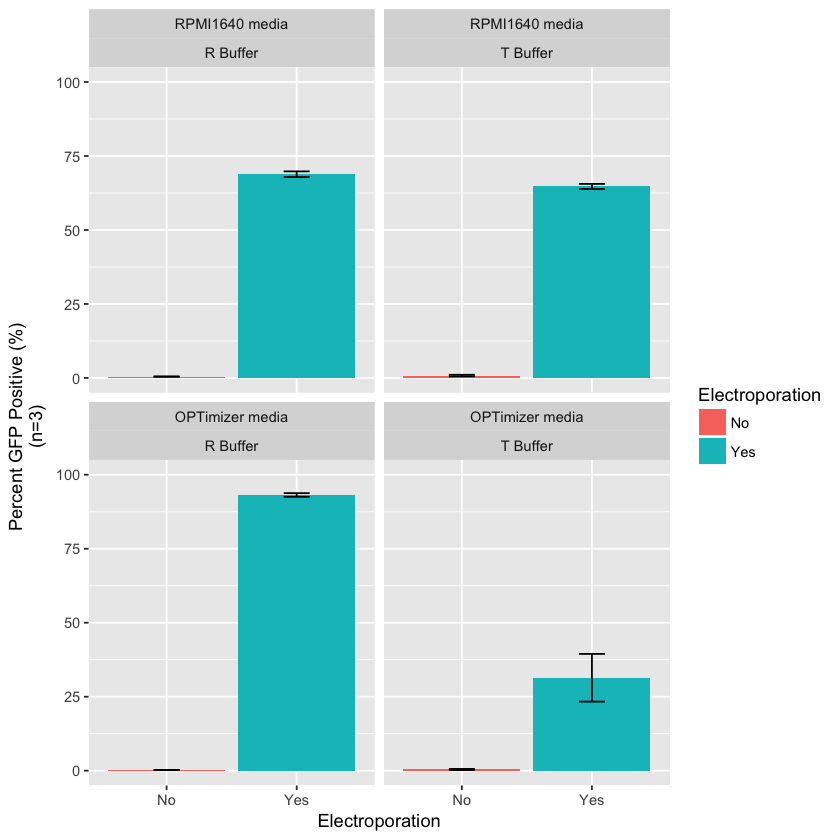

In [6]:
gfp_stats %>%
    ggplot(aes(x=`Electroporation`, y=`GFP_mean`, fill=`Electroporation`)) +
    geom_col(position="dodge") +
    geom_errorbar(
        aes(ymin=`GFP_mean`-`GFP_sd`, ymax=`GFP_mean`+`GFP_sd`),
        width=0.2,
        position=position_dodge(0.9)
    ) +
    facet_wrap(~Media + Buffer) +
    ylim(0, 100) +
    ylab('Percent GFP Positive (%)\n(n=3)')


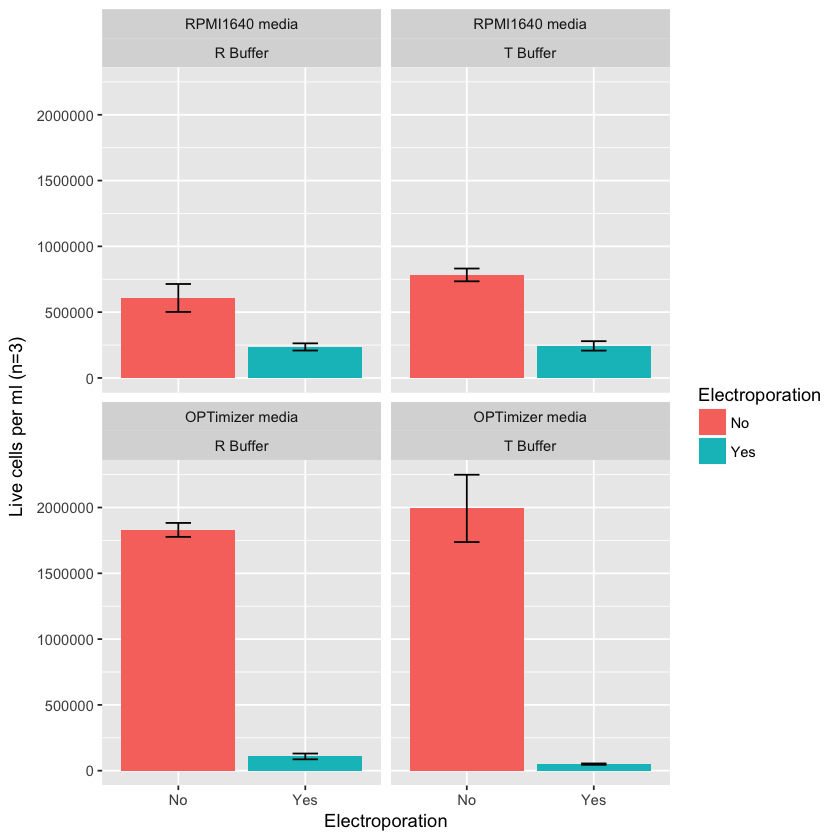

In [10]:
gfp_stats %>%
    ggplot(aes(x=`Electroporation`, y=`Count_mean`, fill=`Electroporation`)) +
    geom_col(position="dodge") +
    geom_errorbar(
        aes(ymin=`Count_mean`-`Count_sd`, ymax=`Count_mean`+`Count_sd`),
        width=0.2,
        position=position_dodge(0.9)
    ) +
    facet_wrap(~Media + Buffer) +
    ylab('Live cells per ml (n=3)')

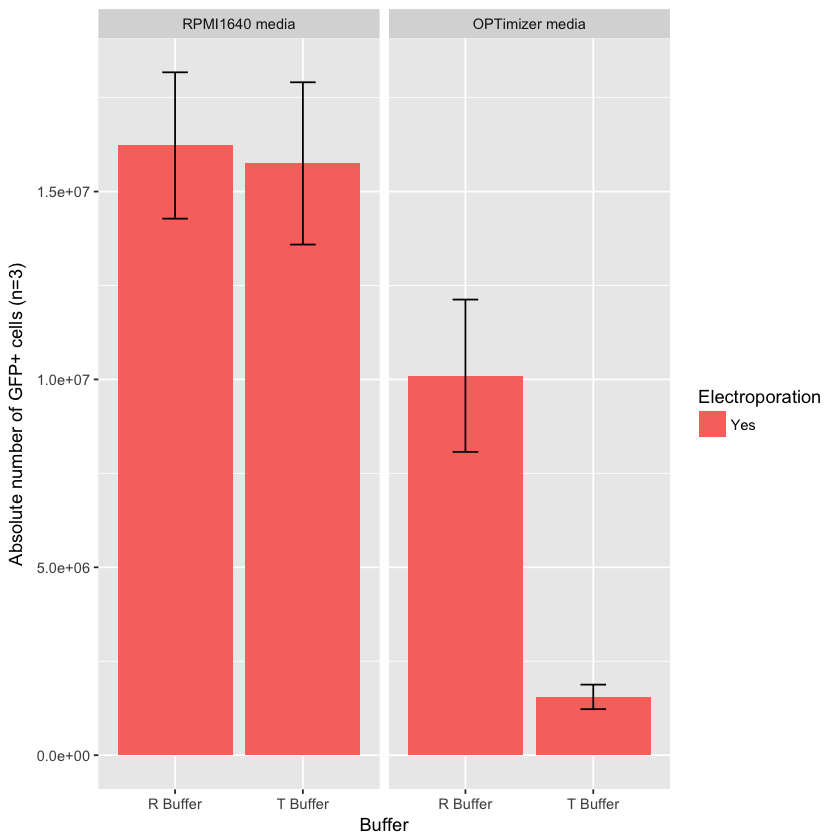

In [9]:
gfp_stats %>%
    filter(`Electroporation` == 'Yes') %>%
    ggplot(aes(x=`Buffer`, y=`Absolute_mean`, fill=`Electroporation`)) +
    geom_col(position="dodge") +
    geom_errorbar(
        aes(ymin=`Absolute_mean`-`Absolute_sd`, ymax=`Absolute_mean`+`Absolute_sd`),
        width=0.2,
        position=position_dodge(0.9)
    ) +
    facet_wrap(~Media) +
    ylab('Absolute number of GFP+ cells (n=3)')